In [2]:
import pandas as pd
import numpy as np
import sys
sys.path.append("..")

from src.data_loader import get_data_adj
from src.portfolio_optimization import max_sharpe_portfolio
from src.backtesting import backtest_portfolio
from src.reporting import (
    plot_cumulative_returns,
    plot_drawdown,
    summary_table,
    export_report_pdf
)

# Param√®tres
tickers = ["AAPL", "MSFT", "TSLA", "GOOGL", "DIS"]
start_date = "2023-08-01"
end_date = "2024-07-31"

# üì• Chargement des prix ajust√©s
prices = get_data_adj(tickers, start=start_date, end=end_date)
returns = np.log(prices / prices.shift(1)).dropna()


[*********************100%***********************]  5 of 5 completed


Optimisation et backtest

In [4]:
mu = returns.mean().values
cov = returns.cov().values
weights = max_sharpe_portfolio(mu, cov)

bt_results = backtest_portfolio(weights, returns)
cumulative = bt_results["Cumulative"]
drawdown = bt_results["Drawdown"]


Visualisations

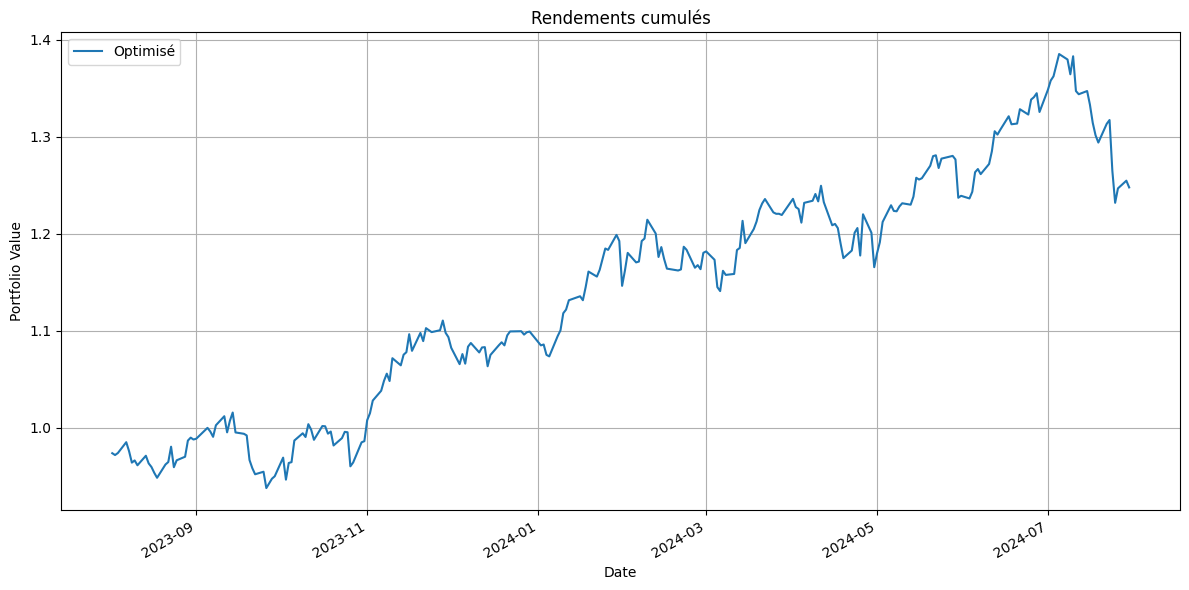

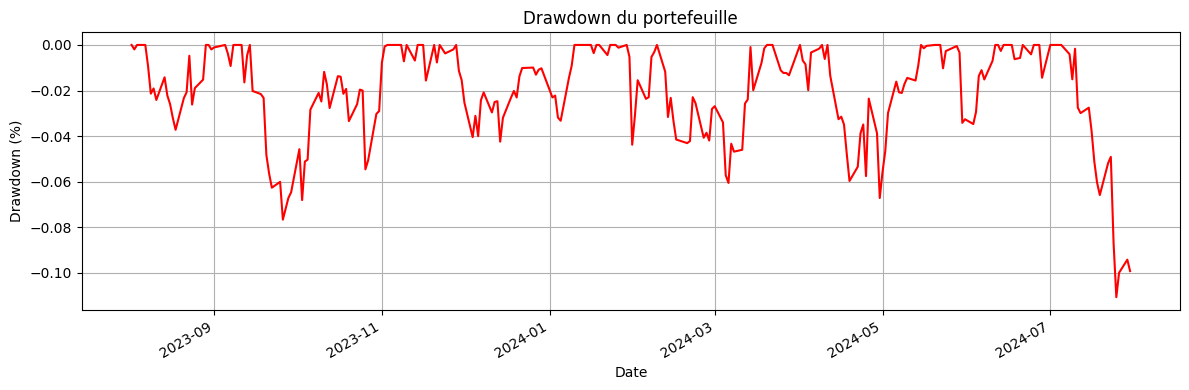

In [5]:
plot_cumulative_returns(cumulative_df=cumulative.to_frame(name="Optimis√©"), title="Rendements cumul√©s")
plot_drawdown(cumulative, title="Drawdown du portefeuille")


Tableau de synth√®se

In [7]:
stats = summary_table(returns @ weights)
print("Statistiques du portefeuille optimis√© :")
print(stats.round(4))


Statistiques du portefeuille optimis√© :
                    Value
Total Return       0.2477
Annualized Return  0.2416
Volatility         0.1922
Sharpe Ratio       1.2569
Max Drawdown      -0.1107


Export du rapport PDF

In [8]:
export_report_pdf(
    filename="rapport_portefeuille.pdf",
    cumulative=cumulative,
    drawdown=drawdown
)
